In [1]:
import torch
import numpy as np
from copy import deepcopy
from typing import OrderedDict
from recovering import label_recovery
from skimage.metrics import structural_similarity as SSIM
from skimage.metrics import peak_signal_noise_ratio as PSNR
import lpips
from torchvision import transforms
from matplotlib import pyplot as plt
from torch import nn
loss_fn = lpips.LPIPS(net='alex')
seed=0
np.random.seed(seed)
torch.manual_seed(seed)

1.12.1 0.13.1
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/yanbo.wang/data/anaconda3/envs/cripac/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/yanbo.wang/data/anaconda3/envs/cripac/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/yanbo.wang/data/anaconda3/envs/cripac/lib/python3.9/site-packages/lpips/weights/v0.1/alex.pth


In [2]:
CONFIG=OrderedDict(device=torch.device('cuda:0'),
    dataset="cifar10",
    network="lenet",
    opt="lbfgs",
    type='label_smooth',
    pretrained=False,
    lr=0.5,
    bound=100,
    iteration=200,
    initia=1.,
    coefficient=1)
test=label_recovery(CONFIG)
test.datadir='/home/yanbo.wang/'+test.datadir
test.datalist='/home/yanbo.wang/'+test.datalist

In [3]:
prob=0  
test.setup(125,prob)

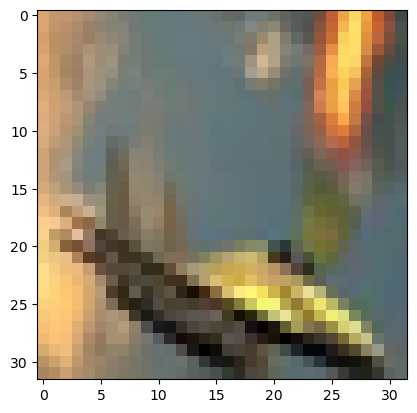

In [4]:
plt.imshow(test.tp(test.origin_data.reshape((3,32,32))))

origin

In [5]:
cost_fn='sim' 

if cost_fn=='l2':
    iteration=300
    lr=0.3
    optim_fn='lbfgs'
    verble=50
    lr_decay=True
    total_v=0
elif cost_fn=='sim':
    iteration=20000
    lr=0.1
    optim_fn='adam'
    verble=1000
    lr_decay=True
    total_v=0

18

In [6]:
test.reconstruct(iteration=iteration, cost_fn=cost_fn, lr=lr, optim_fn=optim_fn, magnify=1,label='origin',verble=verble,lr_decay=lr_decay,total_variation=total_v,keep=False,record_picking=True)

Iter: 1; Loss: 0.1589900255203247
Iter: 1000; Loss: 0.003419816493988037
Iter: 2000; Loss: 0.002889573574066162
Iter: 3000; Loss: 0.0021927356719970703
Iter: 4000; Loss: 0.0028635263442993164
Iter: 5000; Loss: 0.007455706596374512
Iter: 6000; Loss: 0.0015504956245422363
Iter: 7000; Loss: 0.002479732036590576
Iter: 8000; Loss: 0.00027549266815185547
Iter: 9000; Loss: 0.00020068883895874023
Iter: 10000; Loss: 0.00014472007751464844
Iter: 11000; Loss: 9.626150131225586e-05
Iter: 12000; Loss: 6.943941116333008e-05
Iter: 13000; Loss: 5.054473876953125e-05
Iter: 14000; Loss: 4.756450653076172e-05
Iter: 15000; Loss: 4.285573959350586e-05
Iter: 16000; Loss: 3.528594970703125e-05
Iter: 17000; Loss: 2.676248550415039e-05
Iter: 18000; Loss: 2.288818359375e-05
Iter: 19000; Loss: 2.193450927734375e-05
Iter: 20000; Loss: 2.0802021026611328e-05
Total time: 176.30130553245544.


In [9]:
psnr=PSNR(np.asarray(test.tp(test.origin_data.reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data.reshape((3,32,32)))),data_range=256)
ssim=SSIM(np.asarray(test.tp(test.origin_data.reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data.reshape((3,32,32)))),channel_axis=2)
test.tp(test.dummy_data.reshape((3,32,32))).save('iggg.jpg')
lpipss=loss_fn.forward(lpips.im2tensor(lpips.load_image('gt.jpg')),lpips.im2tensor(lpips.load_image('iggg.jpg')))
print(ssim)
print(psnr)
print(lpipss)

0.6867768288364463
16.290770050788893
tensor([[[[0.1659]]]], grad_fn=<AddBackward0>)


2.0682811737060547e-05
19956


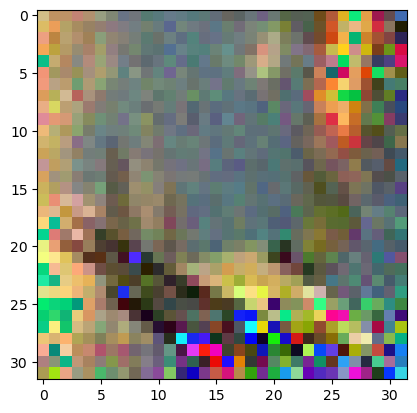

In [10]:
print(test.runningloss)
print(np.argmin(test.buffer_loss))
plt.imshow(test.tp(test.dummy_data.reshape((3,32,32))))

In [11]:
import imageio

In [12]:
image=[]
for ind,i in enumerate(test.buffer_image):
    if ind%200==0 and ind<20000:
        image.append(test.tp(i.reshape((3,32,32))))
imageio.mimsave("/home/yanbo.wang/data/fc_recovery/blog_conv/bs1_cos.gif",image,'GIF',duration=0.002)

In [13]:
cost_fn='l2' 

if cost_fn=='l2':
    iteration=300
    lr=0.3
    optim_fn='lbfgs'
    verble=50
    lr_decay=True
    total_v=0
elif cost_fn=='sim':
    iteration=20000
    lr=0.1
    optim_fn='adam'
    verble=1000
    lr_decay=True
    total_v=0
test.reconstruct(iteration=iteration, cost_fn=cost_fn, lr=lr, optim_fn=optim_fn, magnify=1,label='origin',verble=verble,lr_decay=lr_decay,total_variation=total_v,keep=False,record_picking=True)
psnr=PSNR(np.asarray(test.tp(test.origin_data.reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data.reshape((3,32,32)))),data_range=256)
ssim=SSIM(np.asarray(test.tp(test.origin_data.reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data.reshape((3,32,32)))),channel_axis=2)
test.tp(test.dummy_data.reshape((3,32,32))).save('iggg.jpg')
lpipss=loss_fn.forward(lpips.im2tensor(lpips.load_image('gt.jpg')),lpips.im2tensor(lpips.load_image('iggg.jpg')))
print(ssim)
print(psnr)
print(lpipss)

Iter: 1; Loss: 236.57968139648438
Iter: 50; Loss: 0.0547005720436573
Iter: 100; Loss: 0.0158891212195158
Iter: 150; Loss: 0.011264626868069172
Iter: 200; Loss: 0.010273171588778496
Iter: 250; Loss: 0.010252485051751137
Iter: 300; Loss: 0.010249529033899307
Total time: 87.89336776733398.
0.8154561355182287
19.152733844889955
tensor([[[[0.1745]]]], grad_fn=<AddBackward0>)


In [17]:
image=[]
for ind,i in enumerate(test.buffer_image):
    if ind<300:
        image.append(test.tp(i.reshape((3,32,32))))
imageio.mimsave("/home/yanbo.wang/data/fc_recovery/blog_conv/bs1_l2.gif",image,'GIF',duration=0.01)

In [18]:
image2,label2,_=test._label_smooth(1125,0)

In [19]:
test.origin_data,test.origin_label=test.origin_data.to('cpu'),test.origin_label.to('cpu')
test.origin_data=torch.cat((test.origin_data,image2),0)
test.origin_label=torch.cat((test.origin_label,label2),0)
test.origin_data,test.origin_label=test.origin_data.to(test.device),test.origin_label.to(test.device)

In [20]:
y=test.net(test.origin_data)
loss=test.criterion(y,test.origin_label)
test.net.zero_grad()
dy_dx = torch.autograd.grad(loss, test.net.parameters(),retain_graph=True)
#test.dy_dx=dy_dx
test.whole_gradient = list((_.detach().clone() for _ in dy_dx))
test.net.zero_grad()
loss.backward()
test.input_ground_truth=test.net.temp
test.gradient=deepcopy(test.forward_function.weight.grad)
init_pick=torch.argmax(abs(test.forward_function.weight.grad.sum(dim=1)))
recover_init=deepcopy(test.forward_function.weight.grad[init_pick])# refer to x
test.recover_init=recover_init/test.config['coefficient']
test.ground_truth=np.nanmean((test.net.temp/test.recover_init).cpu().detach())
test.recover_init.requires_grad_(False)
test.dummy_image=torch.randn(test.origin_data.size())

In [21]:
test.origin_data.shape

torch.Size([2, 3, 32, 32])

In [22]:
cost_fn='sim' 

if cost_fn=='l2':
    iteration=300
    lr=0.05
    optim_fn='adam'
    verble=50
    lr_decay=True
    total_v=0
elif cost_fn=='sim':
    iteration=20000
    lr=0.1
    optim_fn='adam'
    verble=1000
    lr_decay=True
    total_v=0

In [23]:
test.reconstruct(iteration=iteration, cost_fn=cost_fn, lr=lr, optim_fn=optim_fn, magnify=1,label='origin',verble=verble,lr_decay=lr_decay,total_variation=total_v,keep=False,record_picking=True)

Iter: 1; Loss: 0.2564031481742859
Iter: 1000; Loss: 0.003616154193878174
Iter: 2000; Loss: 0.0018900036811828613
Iter: 3000; Loss: 0.0020332932472229004
Iter: 4000; Loss: 0.002619802951812744
Iter: 5000; Loss: 0.00125885009765625
Iter: 6000; Loss: 0.001761317253112793
Iter: 7000; Loss: 0.0011643767356872559
Iter: 8000; Loss: 0.0015917420387268066
Iter: 9000; Loss: 0.0010817646980285645
Iter: 10000; Loss: 0.0009047985076904297
Iter: 11000; Loss: 0.0007572770118713379
Iter: 12000; Loss: 0.0006709694862365723
Iter: 13000; Loss: 0.0006108880043029785
Iter: 14000; Loss: 0.0005977153778076172
Iter: 15000; Loss: 0.0005781054496765137
Iter: 16000; Loss: 0.000553429126739502
Iter: 17000; Loss: 0.0005243420600891113
Iter: 18000; Loss: 0.0005087852478027344
Iter: 19000; Loss: 0.000504910945892334
Iter: 20000; Loss: 0.0004994869232177734
Total time: 189.0468213558197.


In [43]:
test.reconstruct(iteration=iteration, cost_fn=cost_fn, lr=lr, optim_fn=optim_fn, magnify=1,label='origin',verble=verble,lr_decay=lr_decay,total_variation=total_v,keep=False,record_picking=True)

Iter: 1; Loss: 0.2564030885696411
Iter: 1000; Loss: 0.004809260368347168
Iter: 2000; Loss: 0.0026966333389282227
Iter: 3000; Loss: 0.018314123153686523
Iter: 4000; Loss: 0.0014654994010925293
Iter: 5000; Loss: 0.0014504790306091309
Iter: 6000; Loss: 0.005638599395751953
Iter: 7000; Loss: 0.0014437437057495117
Iter: 8000; Loss: 0.0010001659393310547
Iter: 9000; Loss: 0.000914454460144043
Iter: 10000; Loss: 0.0008242130279541016
Iter: 11000; Loss: 0.0007269382476806641
Iter: 12000; Loss: 0.000635981559753418
Iter: 13000; Loss: 0.000588834285736084
Iter: 14000; Loss: 0.0005760788917541504
Iter: 15000; Loss: 0.0005586743354797363
Iter: 16000; Loss: 0.0005345344543457031
Iter: 17000; Loss: 0.000507354736328125
Iter: 18000; Loss: 0.0004924535751342773
Iter: 19000; Loss: 0.0004886388778686523
Iter: 20000; Loss: 0.0004831552505493164
Total time: 180.78040885925293.


In [28]:
image=[]
for ind,i in enumerate(test.buffer_image):
    if ind%500==0 and ind<20000:
        image.append(test.tp(i[0].reshape((3,32,32))))
imageio.mimsave("/home/yanbo.wang/data/fc_recovery/blog_conv/bs2_cos.gif",image,'GIF',duration=0.002)
image=[]
for ind,i in enumerate(test.buffer_image):
    if ind%500==0 and ind<20000:
        image.append(test.tp(i[1].reshape((3,32,32))))
imageio.mimsave("/home/yanbo.wang/data/fc_recovery/blog_conv/bs2_cos1.gif",image,'GIF',duration=0.002)

In [24]:
np.argmin(test.buffer_loss)

19991

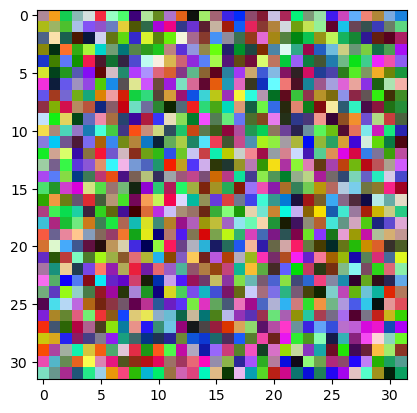

In [26]:
plt.imshow(test.tp(test.buffer_image[19997][1].reshape((3,32,32))))

In [27]:
print(PSNR(np.asarray(test.tp(test.origin_data[0].reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data[0].reshape((3,32,32)))),data_range=256))
print(SSIM(np.asarray(test.tp(test.origin_data[0].reshape((3,32,32)))), np.asarray(test.tp(test.dummy_data[0].reshape((3,32,32)))),channel_axis=2))

9.461124749130008
0.01670989700714937
